<h1><center><font size="10">Tictactrip : exo de crunching</font></center></h1>

# Imporation des données

In [124]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from haversine import haversine

In [2]:
data_ticket = pd.read_csv('D:/Documents/Stats/Tictactrip/Données/ticket_data.csv', delimiter=",", encoding='utf-8')
data_cities = pd.read_csv('D:/Documents/Stats/Tictactrip/Données/cities.csv', delimiter=",", encoding='utf-8')
data_stations = pd.read_csv('D:/Documents/Stats/Tictactrip/Données/stations.csv', delimiter=",", encoding='utf-8')
data_providers = pd.read_csv('D:/Documents/Stats/Tictactrip/Données/providers.csv', delimiter=",", encoding='utf-8')

In [3]:
data_ticket.loc[0:4]

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [4]:
data_cities.loc[0:4]

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [5]:
data_stations.loc[0:4]

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [6]:
data_providers.loc[0:4]

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


# Création de la base par jointure des tables

In [7]:
print('Nombre de stations manquantes :', len(data_ticket[data_ticket.o_station.isna()]),
      '\nNombre de villes manquantes :', len(data_ticket[data_ticket.o_city.isna()]))

Nombre de stations manquantes : 41441 
Nombre de villes manquantes : 0


On remarque que l'on a beaucoup de données manquantes parmis les stations. Ainsi pour calculer la distance d'un trajet, on se focalisera sur les villes et non sur les stations.

In [8]:
data_ticket = data_ticket.join(data_cities[["latitude","longitude"]], on='o_city') #on joint les coordonées de la ville de départ
data_ticket = data_ticket.join(data_cities[["latitude","longitude"]], on='d_city', rsuffix='_dest') #on joint les coordonées de la ville d'arrivée
data_providers = data_providers.rename(columns={'id':'company'})
data_ticket = data_ticket.join(data_providers[['company','transport_type']].set_index('company'), on='company') #On joint le type de transport

In [12]:
data_ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,latitude,longitude,latitude_dest,longitude_dest,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,43.1555,2.3162,43.0341,1.8993,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,43.1555,2.3162,43.0341,1.8993,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,43.1555,2.3162,43.0341,1.8993,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,43.1555,2.3162,43.0341,1.8993,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,43.1555,2.3162,43.0341,1.8993,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,45.0147,1.4833,48.8311,7.0251,bus
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,45.0147,1.4833,48.8311,7.0251,bus
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,45.0147,1.4833,48.8311,7.0251,bus
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,45.0147,1.4833,48.8311,7.0251,bus


# Netoyage de la base

In [13]:
data_ticket.departure_ts = data_ticket.departure_ts.apply(lambda x: str.replace(x, "+00", ""))
data_ticket.arrival_ts = data_ticket.arrival_ts.apply(lambda x: str.replace(x, "+00", ""))
data_ticket.search_ts = data_ticket.search_ts.apply(lambda x: str.replace(x, "+00", ""))

In [14]:
data_ticket.departure_ts = data_ticket.departure_ts.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_ticket.arrival_ts = data_ticket.arrival_ts.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [15]:
data_ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,latitude,longitude,latitude_dest,longitude_dest,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,2017-10-01 00:13:31.327,NaN,NaN,611,542,43.1555,2.3162,43.0341,1.8993,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,2017-10-01 00:13:35.773,"{149,418}",{13},611,542,43.1555,2.3162,43.0341,1.8993,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,2017-10-01 00:13:40.212,"{798,798,6794,6246}","{8377,8376}",611,542,43.1555,2.3162,43.0341,1.8993,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,2017-10-01 00:13:40.213,"{798,798,6794,6246}","{8377,8376}",611,542,43.1555,2.3162,43.0341,1.8993,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,2017-10-01 00:13:40.213,"{5983,5983}",{8380},611,542,43.1555,2.3162,43.0341,1.8993,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00,2017-10-27 16:00:00,2590,2017-10-19 10:35:42.943,"{408,408}",{8371},628,562,45.0147,1.4833,48.8311,7.0251,bus
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00,2017-10-27 13:30:00,2700,2017-10-19 10:35:42.943,"{1105,1105}",{9},628,562,45.0147,1.4833,48.8311,7.0251,bus
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00,2017-10-27 15:15:00,3000,2017-10-19 10:35:42.943,"{1105,1105}",{9},628,562,45.0147,1.4833,48.8311,7.0251,bus
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00,2017-10-27 21:10:00,2880,2017-10-19 10:35:42.943,"{863,863}",{13},628,562,45.0147,1.4833,48.8311,7.0251,bus


# Étude du prix

### Selon le moyen de transport

Voici la répartition des prix selon les différents types de transport :

Text(0.5, 1.0, 'Évolution du prix selon le type de transport')

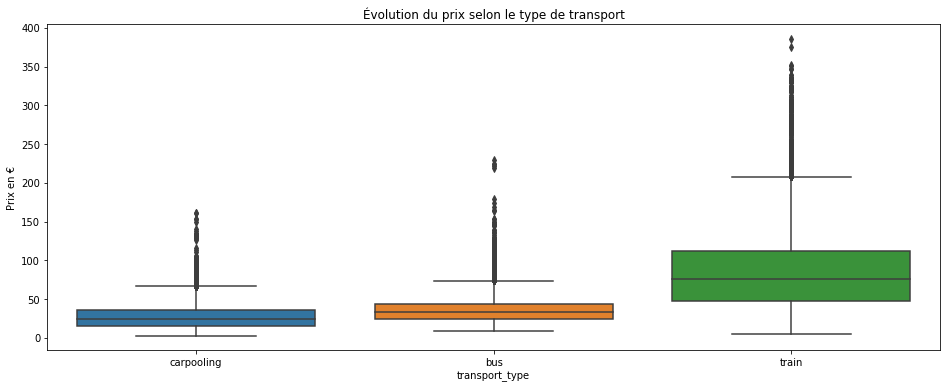

In [74]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="transport_type", y=data_ticket.price_in_cents/100, data=data_ticket)
ax.set(ylabel='Prix en €')
ax.set_title('Évolution du prix selon le type de transport')

In [101]:
print('---- Prix minimum en € ----')
print((data_ticket.groupby(['transport_type']).price_in_cents.min()/100).to_string())

print('---- Prix moyen en € ----')
print((data_ticket.groupby(['transport_type']).price_in_cents.mean()/100).to_string())

print('---- Prix maximum en € ----')
print((data_ticket.groupby(['transport_type']).price_in_cents.max()/100).to_string())

---- Prix minimum en € ----
transport_type
bus           8.5
carpooling    3.0
train         4.9
---- Prix moyen en € ----
transport_type
bus           36.524480
carpooling    27.421719
train         85.066348
---- Prix maximum en € ----
transport_type
bus           229.0
carpooling    161.5
train         385.5


### Selon la distance du trajet

<font size='3'> Il nous faut créer une variable "distance_trajet" indiquant la distance du trajet, de la ville de départ à la ville d'arivée (et non pas des stations comme défini plus haut).<br> 
Pour calculer la distance entre les 2 villes, on utilise la distance de Haversine, qui prend en compte la courbure de la Terre.</font>

In [184]:
data_ticket['distance_trajet'] = data_ticket.latitude
for i in range (data_ticket.index.stop):
    data_ticket.distance_trajet[i] = haversine((data_ticket.latitude_dest[i], data_ticket.longitude_dest[i])
                                               ,(data_ticket.latitude[i], data_ticket.longitude[i]))

C:\Users\monte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<font size='3'> On regroupe ensuite les trajets suivant 4 classes de distance : <br>
0-200km, 201-800km, 800-2000km et plus de 2000km </font>

In [185]:
data_ticket.distance_trajet = pd.cut(data_ticket.distance_trajet, [0,200, 800, 2000, max(data_ticket.distance_trajet)]
                                     , labels=['0-200km', '201-800km', '800-2000km', '2000+km'], right=True)

In [187]:
print('--- Prix moyen selon la distance du trajet ---')
data_ticket.groupby(['distance_trajet']).price_in_cents.mean()/100

--- Prix moyen selon la distance du trajet ---


distance_trajet
0-200km       52.045264
201-800km     46.833407
800-2000km    41.047741
2000+km       31.979915
Name: price_in_cents, dtype: float64

Text(0.5, 1.0, 'Évolution du prix selon le type de transport et la distance du trajet')

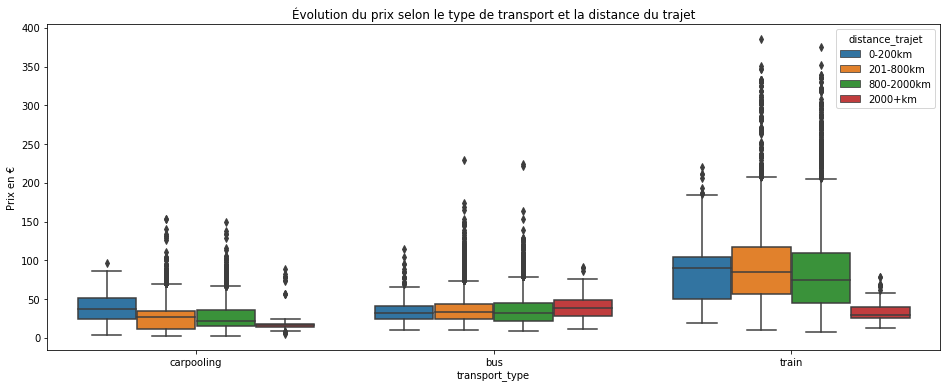

In [188]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="transport_type", y=data_ticket.price_in_cents/100, data=data_ticket, hue='distance_trajet')
ax.set(ylabel='Prix en €')
ax.set_title('Évolution du prix selon le type de transport et la distance du trajet')

# Étude de la durée du trajet

### Selon le moyen de transport

<font size='3'> On créé à présent une variable 'duree_trajet' qui correspond à la différence entre l'heure d'arrivée et l'heure de départ </font>

In [192]:
data_ticket['duree_trajet'] = (data_ticket.arrival_ts - data_ticket.departure_ts)

Text(0.5, 1.0, 'Évolution du temps de trajet selon le type de transport')

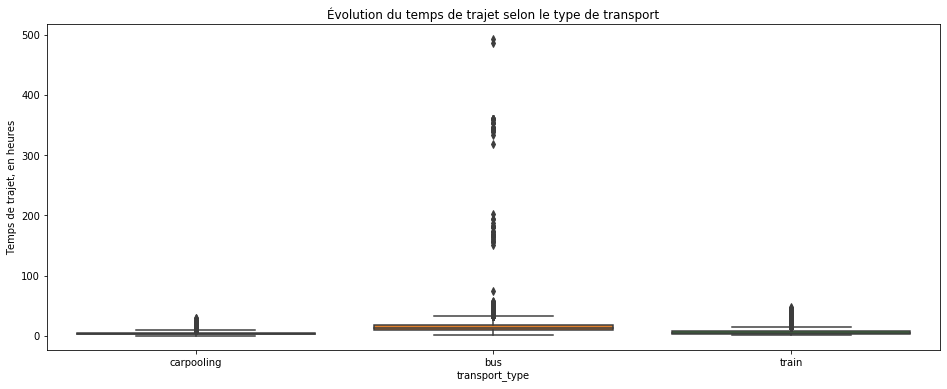

In [200]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="transport_type", y=data_ticket.duree_trajet.dt.total_seconds()/3600, data=data_ticket)
ax.set(ylabel='Temps de trajet, en heures')
ax.set_title('Évolution du temps de trajet selon le type de transport')

<font size='3'> On s'apperçoit que certains trajets sont extrêmement longs (+5 jours). On choisis donc de ne considérer uniquement les voyages de moins de 48 heures : </font>

Text(0.5, 1.0, 'Évolution du temps de trajet selon le type de transport')

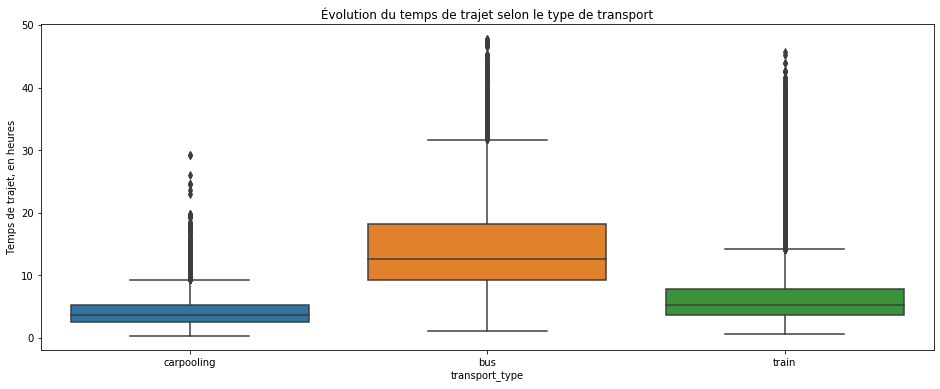

In [201]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="transport_type", y=data_ticket.duree_trajet.dt.total_seconds()/3600, data=data_ticket[data_ticket.duree_trajet.dt.total_seconds()/3600 < 48])
ax.set(ylabel='Temps de trajet, en heures')
ax.set_title('Évolution du temps de trajet selon le type de transport')

In [204]:
print('---- Durée minimum en heures ----')
print((data_ticket[data_ticket.duree_trajet.dt.total_seconds()/3600 < 48].groupby(['transport_type']).duree_trajet.min()).to_string())

print('---- Durée moyenne en heures ----')
#print((data_ticket[data_ticket.duree_trajet.dt.total_seconds()/3600 < 48].groupby(['transport_type']).duree_trajet.mean()).to_string())
for i in ['bus', 'carpooling', 'train'] :
    print ('{0:10}  {1}'.format(i, np.mean(data_ticket[(data_ticket.duree_trajet.dt.total_seconds()/3600 < 48) & (data_ticket.transport_type==i)].duree_trajet)))
    
print('---- Durée maximum en heures ----')
print((data_ticket[data_ticket.duree_trajet.dt.total_seconds()/3600 < 48].groupby(['transport_type']).duree_trajet.max()).to_string())

---- Durée minimum en heures ----
transport_type
bus          01:05:00
carpooling   00:20:00
train        00:39:00
---- Durée moyenne en heures ----
bus         0 days 14:31:47.025016
carpooling  0 days 04:06:38.330156
train       0 days 07:19:55.616018
---- Durée maximum en heures ----
transport_type
bus          1 days 23:45:00
carpooling   1 days 05:10:00
train        1 days 21:43:00
